<a href="https://colab.research.google.com/github/Benvi0h/Machine_Learning_projects_Vikas/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anyone Dataset has to be taken(from github, uci, kaggle etc).
Iris dataset or any dataset from scikit learn should not be used.
All the preprocessing steps discussed in the unit-1 have to be demonstrated.
To be implemented in python.

Preprocessing Steps to be implemented:
1. **Correlation** between all features to be demonstrated.
2. **Missing values** to be checked and handled.
3. **Duplicate values **to be checked and handled.
4. Check the **importance of features** and irrelevant features to be dropped.
5. **Dimensionality** Reduction
6. **Normalization** and **Standardisation** of features 

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
replace diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
import pandas as pd
import seaborn as sb
from matplotlib.axis import Axis
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
dia_df = pd.read_csv("diabetes_prediction_dataset.csv")
dia_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Description of the Attributes

- **gender** - [Male , Female]
- **age** - The age of the person
- **hypertension [0,1]** -  medical condition in which the blood pressure in the arteries is persistently elevated. 
- **heart_disease [0,1]** - Any heart related issues, that is proven to increase the the risk of developing diabetes.
- **Smoking History [current, Never, No-info]** - Whether the person is a smoker or not.
- **BMI (Body Mass Index) [Percentages]** - The fat levels in the body, measured in BMI.
- **Blood_glucose_levels** - Glucose level in the bloodstream of the patient.
- **Diabetes [Yes, No]** - Wether the person has Diabetes or not. 
<br>
<br>

In [ ]:
dia_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Note** : Here in the **smoking history** catergory, it shows there are no null (Nan) values in the dataset, but here, **null** values are denoted by the word "**no-info**", hence that has to be taken care of.

In [ ]:
dia_df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


The attributes of **gender** and **smoking history** are string values, which would prevent us from finding the correlation of the features, hence we convert them to binary numbers, as they are a yes/no (binary) attribute.
We can do that by **encoding** those values to 0 and 1.

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
Encoder = LabelEncoder()

In [ ]:
# applying le on categorical feature columns
dummy_df = dia_df
encoded_dia_df = dia_df

# for column in dia_df.columns:
encoded_dia_df["gender"] = Encoder.fit_transform(dummy_df["gender"])

In [ ]:
encoded_dia_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


# Converted gender to 0 and 1 
- 0 - Female
- 1 - Male

In [ ]:
key = dia_df['smoking_history'].value_counts()

In the above evaluation, we find there are many entries without any information on the smoking history of the patient. So we can fill those values with **"never"**, as it is the **Mode** of the dataset making most sense in terms of representing sample of the dataset. Using the mean or median for categorical data is not viable here as they are useful measures to summarize numerical data, but here we are summarizing categorical data.

<Axes: >

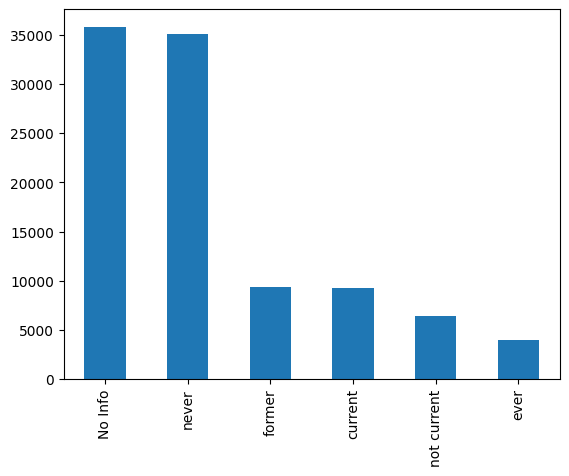

In [ ]:
encoded_dia_df['smoking_history'].value_counts().plot(kind = 'bar')

# Replacing the value of No Info with never. (Missing Values)

In [ ]:
new_smoke_df = encoded_dia_df.replace("No Info", "never", inplace = False)
new_smoke_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,never,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


<Axes: >

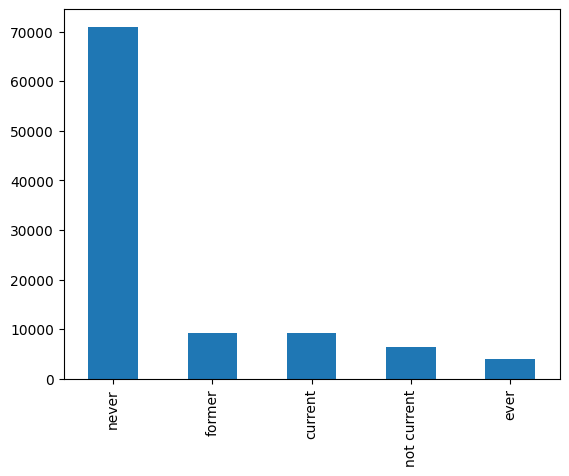

In [ ]:
new_smoke_df['smoking_history'].value_counts().plot(kind = 'bar')

# Encoding Smoking history
Now to find convert this text to numeric data, we need to assign numbers to each category, making them numerically categorical. We can One-hot encode or Label-encode the data. Here we will have to One-hot encode as there are more than two categories (5 categories) and label encoding will assign them according to a rank based on frequency. Here the status of smoking does not inherenttly have any order or rank, one hot encding will encode the data catgorically without an order/rank, and maintain the data's independence.

In [ ]:
# import labelencoder
from sklearn.preprocessing import OneHotEncoder

# instantiate labelencoder object
Hot_Encoder = OneHotEncoder()

In [ ]:
feature_values = Hot_Encoder.fit_transform(new_smoke_df[["smoking_history"]]).toarray()
print(feature_values)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


The Encoder makes 5 new features for each smoking status as a column/ Feature.

In [ ]:
Hot_Encoder.categories_

[array(['current', 'ever', 'former', 'never', 'not current'], dtype=object)]

In [ ]:
feature_labels = Hot_Encoder.categories_
feature_labels

[array(['current', 'ever', 'former', 'never', 'not current'], dtype=object)]

Convert this result to a dataframe and append it to the original dataframe.

In [ ]:
feature_df = pd.DataFrame(feature_values, columns =feature_labels)
feature_df.head()

,current,ever,former,never,not current
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [ ]:
final_df = pd.concat([new_smoke_df, feature_df],axis=1)
final_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,"(current,)","(ever,)","(former,)","(never,)","(not current,)"
0,0,80.0,0,1,never,25.19,6.6,140,0,0.0,0.0,0.0,1.0,0.0
1,0,54.0,0,0,never,27.32,6.6,80,0,0.0,0.0,0.0,1.0,0.0
2,1,28.0,0,0,never,27.32,5.7,158,0,0.0,0.0,0.0,1.0,0.0
3,0,36.0,0,0,current,23.45,5.0,155,0,1.0,0.0,0.0,0.0,0.0
4,1,76.0,1,1,current,20.14,4.8,155,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,never,27.32,6.2,90,0,0.0,0.0,0.0,1.0,0.0
99996,0,2.0,0,0,never,17.37,6.5,100,0,0.0,0.0,0.0,1.0,0.0
99997,1,66.0,0,0,former,27.83,5.7,155,0,0.0,0.0,1.0,0.0,0.0
99998,0,24.0,0,0,never,35.42,4.0,100,0,0.0,0.0,0.0,1.0,0.0


# Correlation and Dropping of Smoking_history as it is irrelevant post encoding

In [ ]:
final_df.drop(["smoking_history"], axis =1,inplace = True)
final_df.columns = final_df.columns
final_df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,"(current,)","(ever,)","(former,)","(never,)","(not current,)"
0,0,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,1.0,0.0
1,0,54.0,0,0,27.32,6.6,80,0,0.0,0.0,0.0,1.0,0.0
2,1,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,1.0,0.0
3,0,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,0.0
4,1,76.0,1,1,20.14,4.8,155,0,1.0,0.0,0.0,0.0,0.0


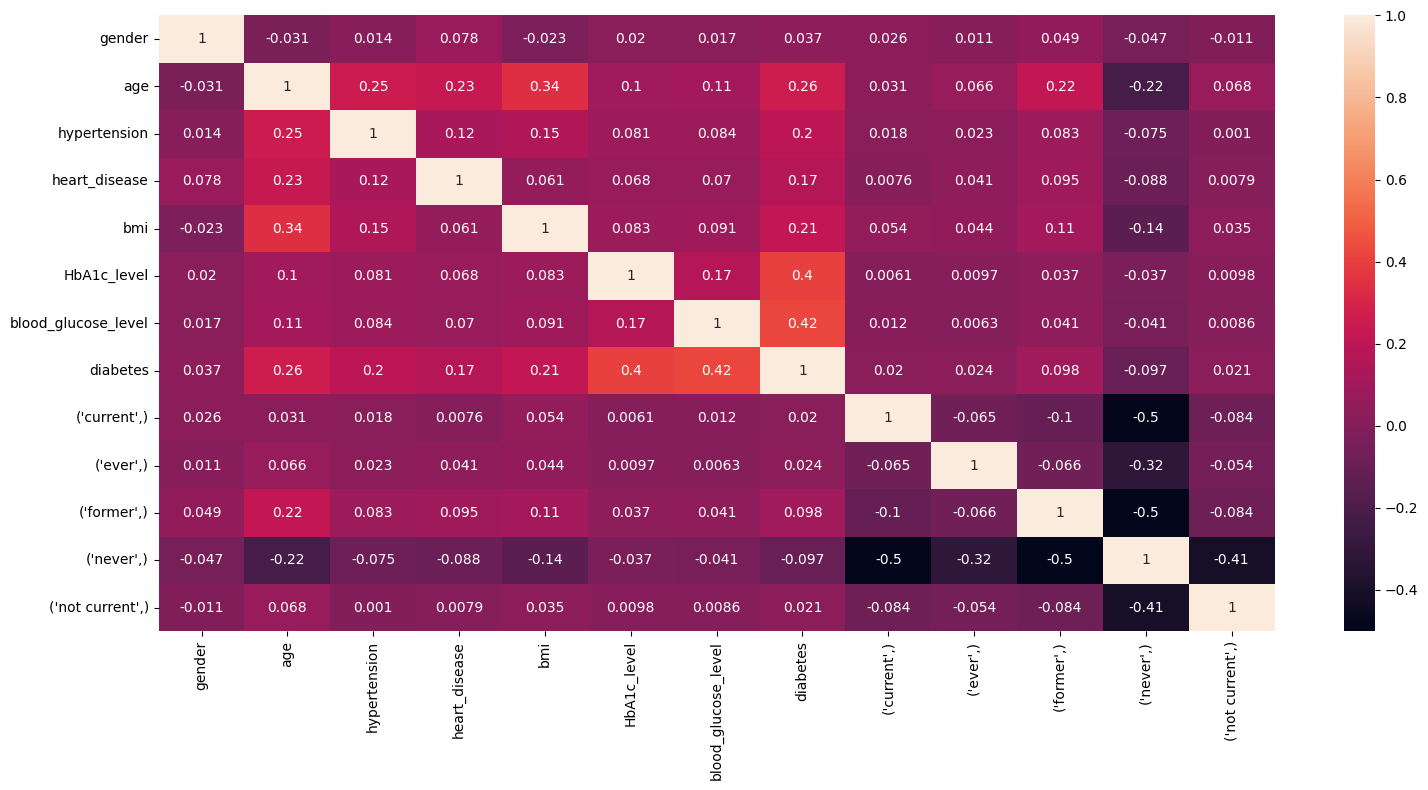

In [ ]:
plt.figure(figsize=(18,8))
corr = final_df.corr()
data_map = sb.heatmap(corr, annot = True)

We could remove Gender as well, as according to the correlation coefficients of gender with respect to diabeties inference is quiet low, 0.037 or 3% positive- correlation.
Hence we create two datasets , one with gender and without gender, and see how they would perform and compare.

.corr() method calculates and displays the pearson correlation coefficient, which can be used for feature selection.

In [ ]:
final_df_without_gender = final_df.drop("gender", axis= 1)
final_df_without_gender.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,"(current,)","(ever,)","(former,)","(never,)","(not current,)"
0,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,0.0,0.0,0.0,1.0,0.0
2,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,1.0,0.0,0.0,0.0,0.0


# Dimentiaonality reduction and Feature scaling
Dimenion of this dataset can be reduced and retain its usefulness, with the process of dimentionlaity reduction. This process when applied in the right ratio of components, could have better performance with the same accuracy/ results.

In order to calculate the dimentionality accuratly and measure its unsefull, we need to scale all the values in the dataset, for which we use the Standard scaler to scale the dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## Scaling (Standardization)

In [ ]:
final_df_scaled = scaler.fit_transform(final_df.values)
final_df_without_gender_scaled = scaler.fit_transform(final_df_without_gender.values)

scaled_features = final_df.columns
scaled_features_wg = final_df_without_gender.columns

final_df_scaled = pd.DataFrame(final_df_scaled,columns = scaled_features)
final_df_without_gender_scaled = pd.DataFrame(final_df_without_gender_scaled,columns = scaled_features_wg)

final_df_scaled.head()
final_df_without_gender_scaled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,"(current,)","(ever,)","(former,)","(never,)","(not current,)"
0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
final_df_scaled.columns

Index([             'gender',                 'age',        'hypertension',
             'heart_disease',                 'bmi',         'HbA1c_level',
       'blood_glucose_level',            'diabetes',          ('current',),
                   ('ever',),           ('former',),            ('never',),
            ('not current',)],
      dtype='object')

In [ ]:
Feature_df = final_df_scaled.drop("diabetes",axis=1)
Label_df = final_df_scaled[["diabetes"]]

Feature_df_without_gender = final_df_without_gender_scaled.drop("diabetes",axis=1)
Label_df_without_gender = final_df_without_gender_scaled[["diabetes"]]

Label_df_without_gender

,diabetes
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
99995,0.0
99996,0.0
99997,0.0
99998,0.0


## Dimentionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
Feature_df.shape
Feature_df_without_gender.shape

(100000, 11)

In [ ]:
pca = PCA(0.98) #Retain 90% of information from the data it is going to fit
pca2 = PCA(0.98)

reduced_feature_df = pca.fit_transform(Feature_df.values)
reduced_feature_df_without_gender_scaled = pca2.fit_transform(Feature_df_without_gender.values)

print(reduced_feature_df.shape)
print(reduced_feature_df_without_gender_scaled.shape)

(100000, 10)
(100000, 9)


So once Principal Component analysis is applied to the datasets, the number of columns have been reduced from **13** columns to **10** in the **final_df** dataframe and from **12** to **9** in **final_df_without_gender_scaled** , as descibed in using the .shape function.

In [ ]:
print(pca.n_components_)
print(pca2.n_components_)

10
9


In [ ]:
print(pca.get_feature_names_out())

['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9']


showing how much of variance each column in the dataset captures.


In [ ]:
variance_ratios = pca.explained_variance_ratio_
i = 0
for item in variance_ratios:
  i += 1
  print("column",i,": ",round(item*100,2),"%\n")

column 1 :  33.98 %

column 2 :  13.03 %

column 3 :  10.34 %

column 4 :  9.03 %

column 5 :  7.66 %

column 6 :  6.73 %

column 7 :  5.62 %

column 8 :  5.06 %

column 9 :  4.18 %

column 10 :  3.72 %



In [ ]:
variance_ratios_2 = pca2.explained_variance_ratio_
i = 0
for item in variance_ratios_2:
  i += 1
  print("column",i,": ",round(item*100,2),"%\n")

column 1 :  36.75 %

column 2 :  14.1 %

column 3 :  11.18 %

column 4 :  9.7 %

column 5 :  7.35 %

column 6 :  6.08 %

column 7 :  5.5 %

column 8 :  4.6 %

column 9 :  4.03 %



# Final Datasets

In [ ]:
reduced_final_df = pd.DataFrame(reduced_feature_df)
reduced_final_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.195105,0.450167,0.372166,0.103554,-0.162264,-0.487338,0.014382,0.160328,0.800029,-0.150758
1,-0.308791,0.091487,0.070306,0.060163,-0.232664,-0.104934,-0.007889,-0.001648,-0.057248,-0.328164
2,-0.348078,-0.067785,-0.083349,-0.093795,0.287525,-0.048158,-0.017194,0.082409,-0.046556,0.062051
3,0.798056,-0.694420,0.359728,-0.245811,-0.278845,0.025296,-0.093183,-0.001019,0.032609,0.116082
4,1.019712,0.100246,1.186878,-0.249127,0.435104,0.174956,-0.072109,-0.185585,0.783346,0.077702


In [ ]:
reduced_final_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-1.874056e-18,-7.121415e-17,-4.877876e-17,-1.437073e-17,2.325251e-17,7.419843e-17,8.224532e-18,7.233325e-17,2.670308e-17,-1.706191e-17
std,5.212092e-01,3.227462e-01,2.874644e-01,2.686516e-01,2.474438e-01,2.319817e-01,2.119648e-01,2.011561e-01,1.828771e-01,1.724409e-01
min,-4.463868e-01,-9.752246e-01,-8.007639e-01,-4.897985e-01,-4.220350e-01,-6.500147e-01,-3.086642e-01,-6.452996e-01,-3.588102e-01,-4.626719e-01
25%,-3.642799e-01,-1.842515e-01,-1.759667e-01,-1.224110e-01,-2.132576e-01,-1.538074e-01,-5.907022e-02,-1.350326e-01,-9.058213e-02,-1.107019e-01
50%,-2.975743e-01,-2.148673e-02,-3.235581e-02,-1.330452e-02,-1.233256e-01,-1.014683e-02,-1.273773e-02,5.344718e-03,-2.444241e-02,-7.138297e-03
75%,6.756899e-01,1.719619e-01,1.338329e-01,5.667901e-02,2.486506e-01,1.254960e-01,1.279803e-03,1.284651e-01,3.663779e-02,1.252247e-01
max,1.080109e+00,1.242228e+00,1.322753e+00,1.009699e+00,9.679009e-01,9.900496e-01,1.048603e+00,1.016468e+00,1.085693e+00,5.881473e-01


In [ ]:
reduced_final_df_without_gender_scaled = pd.DataFrame(reduced_feature_df_without_gender_scaled)
reduced_final_df_without_gender_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.189484,0.449909,0.363781,0.077553,-0.503525,0.021664,0.192729,0.780638,-0.149737
1,-0.302928,0.091205,0.059672,0.012676,-0.162952,-0.013157,-0.022337,-0.082769,-0.328040
2,-0.356584,-0.067365,-0.067938,-0.027785,0.029096,-0.008312,0.110039,-0.009114,0.061722
3,0.804233,-0.694732,0.351697,-0.298074,-0.041619,-0.099719,-0.022377,0.000441,0.116347
4,1.011526,0.100595,1.206619,-0.146568,0.289054,-0.060179,-0.117524,0.834334,0.078229


In [ ]:
reduced_final_df_without_gender_scaled.describe()

,0,1,2,3,4,5,6,7,8
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-2.975398e-18,-7.386092e-17,-4.511946e-17,-1.231015e-17,7.735146e-17,7.833734e-18,7.284839e-17,2.379874e-17,-1.629807e-17
std,5.210460e-01,3.227461e-01,2.873766e-01,2.676265e-01,2.330170e-01,2.119926e-01,2.016330e-01,1.843529e-01,1.724410e-01
min,-4.408215e-01,-9.748259e-01,-7.865753e-01,-4.476655e-01,-5.462508e-01,-2.988090e-01,-6.287938e-01,-3.710044e-01,-4.621172e-01
25%,-3.633983e-01,-1.842055e-01,-1.738377e-01,-6.757108e-02,-1.602892e-01,-4.996558e-02,-1.348498e-01,-8.738416e-02,-1.107482e-01
50%,-2.973277e-01,-2.147735e-02,-3.399877e-02,-2.043372e-02,-2.049188e-02,-1.279185e-02,4.207342e-03,-2.695532e-02,-7.141993e-03
75%,6.769278e-01,1.720029e-01,1.327757e-01,3.022514e-02,1.288328e-01,2.621971e-04,1.280799e-01,3.384983e-02,1.252167e-01
max,1.072443e+00,1.241996e+00,1.343601e+00,1.018129e+00,9.823411e-01,1.052911e+00,1.052812e+00,1.082350e+00,5.883616e-01


# Model Implementation (Decision Tree classifier)
In this implementation we use the decision tree model from the sklearn learn library and visualize results and determine the efficiency and accuracy of the model.

In [ ]:
Label_df
Label_df_without_gender

reduced_final_df
reduced_final_df_without_gender_scaled

,0,1,2,3,4,5,6,7,8
0,-0.189484,0.449909,0.363781,0.077553,-0.503525,0.021664,0.192729,0.780638,-0.149737
1,-0.302928,0.091205,0.059672,0.012676,-0.162952,-0.013157,-0.022337,-0.082769,-0.328040
2,-0.356584,-0.067365,-0.067938,-0.027785,0.029096,-0.008312,0.110039,-0.009114,0.061722
3,0.804233,-0.694732,0.351697,-0.298074,-0.041619,-0.099719,-0.022377,0.000441,0.116347
4,1.011526,0.100595,1.206619,-0.146568,0.289054,-0.060179,-0.117524,0.834334,0.078229
...,...,...,...,...,...,...,...,...,...
99995,-0.245238,0.262178,0.201718,0.054179,-0.359901,-0.024020,-0.119975,-0.147043,-0.255079
99996,-0.420938,-0.256231,-0.229107,-0.072182,0.234526,0.007547,0.143899,0.063856,-0.232158
99997,0.898136,0.528423,-0.438616,-0.351437,-0.115867,-0.107727,0.015393,-0.119769,0.041377
99998,-0.376157,-0.138072,-0.139123,-0.044095,0.069446,0.009422,-0.270308,0.067352,0.024735


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reduced_final_df,Label_df)
X_train_wg, X_test_wg, Y_train_wg, Y_test_wg = train_test_split(reduced_final_df_without_gender_scaled,Label_df_without_gender)

Y_train.shape[0]

75000

In [ ]:
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score
import random

In [ ]:
def Classifier_func(X,y,start ,stop ,step , X_test, Y_test,min_sample=1):
      # prune_alpha = 0.0
      rate = 1
      Score = 0.00
      N_Score = 0.00
      Closeness = 0.00
      New_Closeness = 0.00
      Test_score_list = []
      Train_score_list = []
      Closeness_list =[]
      alpha_list = []
      f_alpha = 0.00
      ideal_alpha = 0.00
      d= dict()
      ideal_predictions = []
      state = 0
      ideal_state = 0

      attributes = []
      init_step = step
      f_predict = np.empty( y.shape[0], dtype=object)

      alpha = start

      # (converge in 30secs - 1:30 mins)
      while(alpha <= stop):
        step = step * rate
        alpha = alpha + step
        state = random.randint(0, 4)
        clf = tree.DecisionTreeClassifier(ccp_alpha = alpha, random_state = state, min_samples_leaf = min_sample)
        clf.fit(X,y)
        Train_Score = clf.score(X,y)

        if Train_Score == N_Score :
          rate += 1

        else :
          step =  init_step
          rate = 1
          N_Score = Train_Score
          predict = clf.predict(X_test)
          Test_score = accuracy_score(Y_test, predict)
          if alpha < stop :
            Test_score_list.append(Test_score)
            Train_score_list.append(N_Score)

          
            print("Alpha :",round(alpha,5),"Random State :",state,"Train-Score :",round(N_Score*100,2),"%","Test-Score :",round(Test_score*100,2),"%","Number of nodes :",clf.get_n_leaves())
            New_closeness = abs(N_Score-Test_score)


            Closeness_list.append(New_closeness)
            alpha_list.append(alpha)

            d['Test_score_list'] = Test_score_list
            d['Train_score_list'] = Train_score_list
            d['alpha_list'] = alpha_list  

          if New_closeness < Closeness or Closeness == 0.00 :
            Closeness = New_closeness
            ideal_alpha = alpha 
            ideal_predictions = predict
            ideal_state = state

          d['Closeness_list'] = Closeness_list
          d['Closeness'] = Closeness
          d['f_alpha'] = ideal_alpha
          d['f_predict'] = ideal_predictions
          d['clf'] = tree.DecisionTreeClassifier(ccp_alpha = ideal_alpha, random_state = ideal_state)
          d['attributes'] = ['Test_score_list', 'Train_score_list','alpha_list', 'Closeness_list', 'Closeness', 'f_alpha', 'f_predict', 'clf', 'attributes' ]
      # (10 mins did not converge)
      # for alpha in np.arange(start,stop,step):
        # alpha = alpha + (step * rate)
        # clf = tree.DecisionTreeClassifier(ccp_alpha = alpha)
        # clf.fit(X,y)
        # Train_Score = clf.score(X,y)
        
        # if Train_Score == N_Score :
        #   rate += 1
        #   step = step * rate
        #   continue

        # else:
        #   step =  init_step
        #   N_Score = Train_Score
        #   predict = clf.predict(X_test)
        #   Test_score = accuracy_score(Y_test, predict)

        #   Test_score_list.append(N_Score)
        #   Train_score_list.append(Test_score)

        #   print("Alpha :",round(alpha,5),"Train-Score :",round(N_Score*100,2),"%","Test-Score :",round(Test_score*100,2),"%")
        #   New_closeness = N_Score-Test_score

        #   Closeness_list.append(New_closeness)
        #   alpha_list.append(alpha)

        #   d['Test_score_list'] = Test_score_list
        #   d['Train_score_list'] = Train_score_list
        #   d['alpha_list'] = alpha_list  

          # if New_Closeness < Closeness or Closeness == 0.00 :
          #   d['Closeness'] = Closeness_list
          #   d['f_alpha'] = alpha
          #   d['f_predict'] = predict
          #   d['clf'] = tree.DecisionTreeClassifier(ccp_alpha = ideal_alpha)
            
      print("Ideal Alpha :", ideal_alpha, "Closeness :", Closeness)   
      return d
              

In [ ]:
# start = 0
# stop = 100
# step = 1
# rate = 1

# alpha = start

# while(alpha != stop):
#   alpha = alpha + (step * rate)
#   print(alpha)

#   if(alpha % 2 == 0):
#     rate += 1
  
#   else:
#     rate = 1

In [ ]:
obj = Classifier_func(X_train,Y_train,0,0.1,0.0001,X_test,Y_test,450)

Alpha : 0.0001 Random State : 2 Train-Score : 95.39 % Test-Score : 95.18 % Number of nodes : 23
Alpha : 0.0154 Random State : 4 Train-Score : 94.43 % Test-Score : 94.28 % Number of nodes : 2
Ideal Alpha : 0.0154 Closeness : 0.0014666666666667272


In [ ]:
# len(obj['Test_score_list'])
# len(obj['alpha_list'])
obj['Closeness_list']

[0.0020799999999999708, 0.0014666666666667272]

In [ ]:
obj_wg = Classifier_func(X_train_wg,Y_train_wg,0,0.1,0.0001, X_test_wg,Y_test_wg ,400)

Alpha : 0.0001 Random State : 0 Train-Score : 95.51 % Test-Score : 95.42 % Number of nodes : 24
Alpha : 0.0154 Random State : 0 Train-Score : 94.51 % Test-Score : 94.4 % Number of nodes : 2
Ideal Alpha : 0.0001 Closeness : 0.0009066666666666112


In [ ]:
print(obj['attributes'])
print(obj_wg['attributes'])

['Test_score_list', 'Train_score_list', 'alpha_list', 'Closeness_list', 'Closeness', 'f_alpha', 'f_predict', 'clf', 'attributes']
['Test_score_list', 'Train_score_list', 'alpha_list', 'Closeness_list', 'Closeness', 'f_alpha', 'f_predict', 'clf', 'attributes']


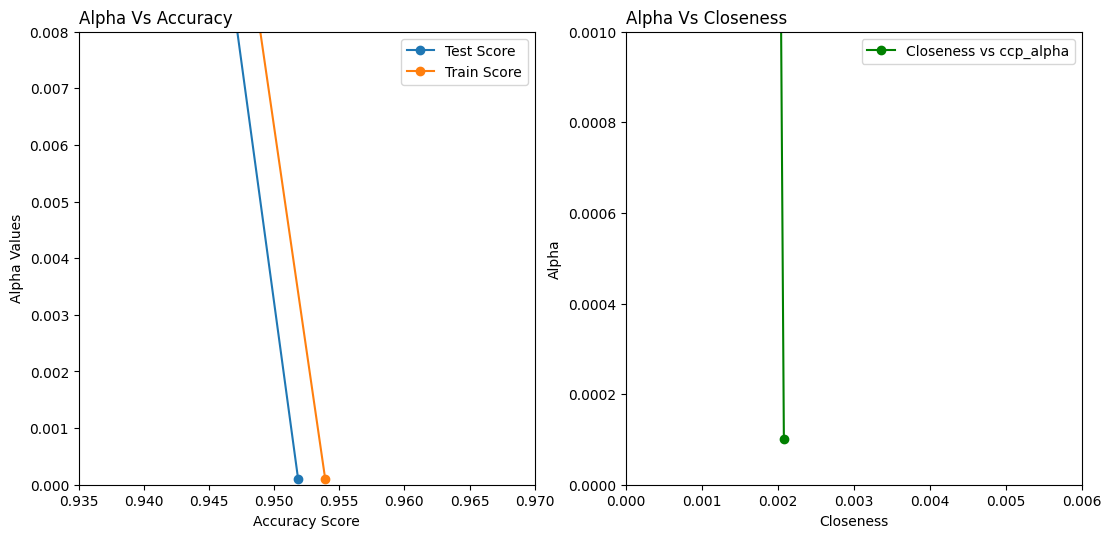

In [ ]:
fig = plt.figure(figsize = (20,20))

subplot1 = fig.add_subplot(3,3,1)
subplot2 = fig.add_subplot(3,3,2)

subplot1.plot(np.array(obj['Test_score_list']), np.array(obj['alpha_list']),marker = 'o',label = "Test Score")
subplot1.plot(np.array(obj['Train_score_list']), np.array(obj['alpha_list']),marker = 'o', label = "Train Score")
subplot1.set_xlabel("Accuracy Score")
subplot1.set_ylabel("Alpha Values")
subplot1.set_xlim(0.935, 0.97)
subplot1.set_ylim(0., 0.008)
subplot1.legend()
subplot1.set_title("Alpha Vs Accuracy", loc = 'left')

subplot2.plot(np.array(obj['Closeness_list']), np.array(obj['alpha_list']),  marker = 'o', label = 'Closeness vs ccp_alpha', color = "green")
subplot2.set_xlabel("Closeness")
subplot2.set_ylabel("Alpha")
subplot2.set_xlim(0., 0.006)
subplot2.set_ylim(0., 0.001)
subplot2.legend()
subplot2.set_title("Alpha Vs Closeness", loc = 'left')

fig.show()

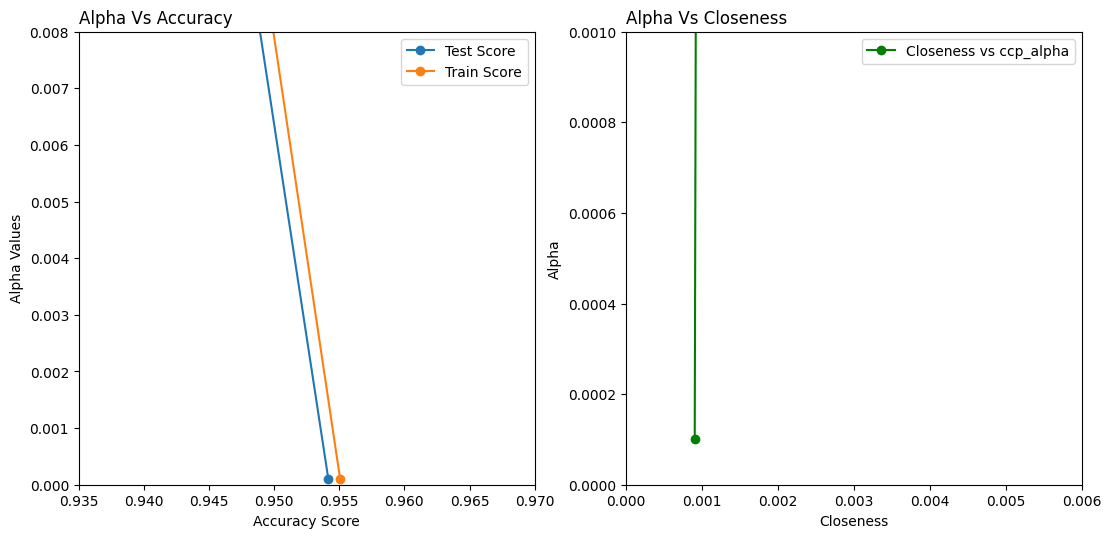

In [ ]:
fig = plt.figure(figsize = (20,20))

subplot1 = fig.add_subplot(3,3,1)
subplot2 = fig.add_subplot(3,3,2)

subplot1.plot(np.array(obj_wg['Test_score_list']), np.array(obj_wg['alpha_list']),marker = 'o',label = "Test Score")
subplot1.plot(np.array(obj_wg['Train_score_list']), np.array(obj_wg['alpha_list']),marker = 'o', label = "Train Score")
subplot1.set_xlabel("Accuracy Score")
subplot1.set_ylabel("Alpha Values")
subplot1.set_xlim(0.935, 0.97)
subplot1.set_ylim(0., 0.008)
subplot1.legend()
subplot1.set_title("Alpha Vs Accuracy", loc = 'left')

subplot2.plot(np.array(obj_wg['Closeness_list']), np.array(obj_wg['alpha_list']),  marker = 'o', label = 'Closeness vs ccp_alpha', color = "green")
subplot2.set_xlabel("Closeness")
subplot2.set_ylabel("Alpha")
subplot2.set_xlim(0., 0.006)
subplot2.set_ylim(0., 0.001)
subplot2.legend()
subplot2.set_title("Alpha Vs Closeness", loc = 'left')

fig.show()

In [ ]:
model = obj['clf']
model_wg = obj_wg['clf']

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0154, random_state=4)

In [ ]:
model_wg.fit(X_train_wg,Y_train_wg)

DecisionTreeClassifier(ccp_alpha=0.0001, random_state=0)

In [ ]:
print("Model score with gender",round(model.score(X_train,Y_train),3)*100,"%")
print("Model score without gender",round(model_wg.score(X_train_wg,Y_train_wg),4)*100,"%")

Model score with gender 94.39999999999999 %
Model score without gender 96.82 %


In [ ]:
predictions = model.predict(X_test)
predictions_wg = model_wg.predict( X_test_wg)

# Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [ ]:
acc = accuracy_score(Y_test, predictions)
acc_wg = accuracy_score(Y_test_wg,predictions_wg)

print("Accuracy score with gender :",acc)
print("Accuracy score without gender :",acc_wg)

Accuracy score with gender : 0.9428
Accuracy score without gender : 0.965


In [ ]:
print("Confusion matrix with gender \n",confusion_matrix(Y_test,predictions,labels= [0,1]))
print("Confusion matrix without gender \n",confusion_matrix(Y_test_wg,predictions_wg,labels= [0,1]))

Confusion matrix with gender 
 [[22636   235]
 [ 1195   934]]
Confusion matrix without gender 
 [[22840    44]
 [  831  1285]]


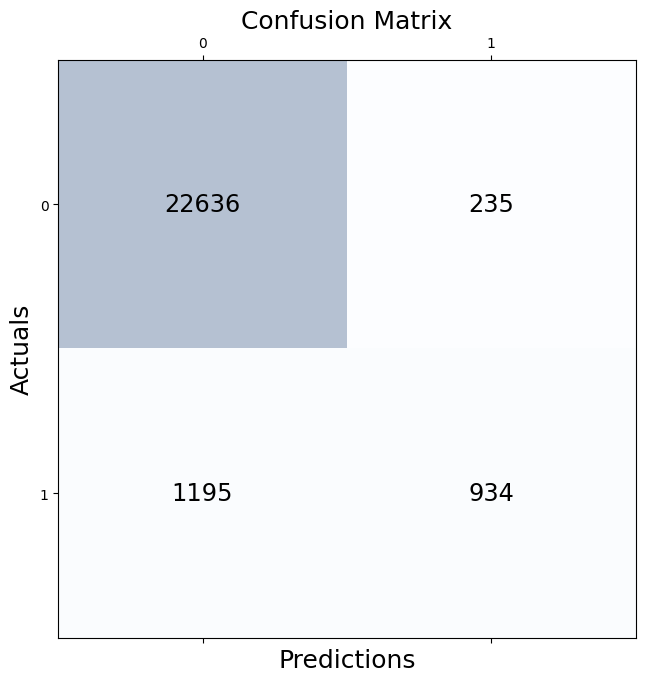

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix(Y_test,predictions,labels= [0,1]), cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix(Y_test,predictions,labels= [0,1]).shape[0]):
    for j in range(confusion_matrix(Y_test,predictions,labels= [0,1]).shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix(Y_test,predictions,labels= [0,1])[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("Classification Report with Gender\n",classification_report(Y_test,predictions,target_names=["Diabetes", "No Diabetes"]))
print("\n")
print("Classification Report without Gender\n",classification_report(Y_test_wg,predictions_wg,target_names=["Diabetes", "No Diabetes"]))

Classification Report with Gender
               precision    recall  f1-score   support

    Diabetes       0.95      0.99      0.97     22871
 No Diabetes       0.80      0.44      0.57      2129

    accuracy                           0.94     25000
   macro avg       0.87      0.71      0.77     25000
weighted avg       0.94      0.94      0.94     25000



Classification Report without Gender
               precision    recall  f1-score   support

    Diabetes       0.96      1.00      0.98     22884
 No Diabetes       0.97      0.61      0.75      2116

    accuracy                           0.96     25000
   macro avg       0.97      0.80      0.86     25000
weighted avg       0.97      0.96      0.96     25000



Feature  0 :  0.0 %
Feature  1 :  0.0 %
Feature  2 :  0.0 %
Feature  3 :  0.0 %
Feature  4 :  0.0 %
Feature  5 :  0.0 %
Feature  6 :  0.0 %
Feature  7 :  100.0 %
Feature  8 :  0.0 %
Feature  9 :  0.0 %


<Axes: >

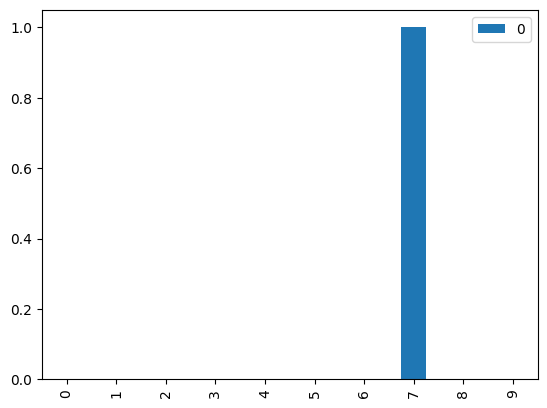

In [ ]:
i = 0
for feature in model.feature_importances_:
  print("Feature ",i,": ",round(feature*100,2),"%")
  i += 1

feature_names = ['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']
feature_importance = model.feature_importances_
pd.DataFrame(feature_importance).head(200).plot(kind = 'bar')

Feature  0 :  7.89 %
Feature  1 :  0.0 %
Feature  2 :  0.63 %
Feature  3 :  0.0 %
Feature  4 :  1.06 %
Feature  5 :  1.46 %
Feature  6 :  67.82 %
Feature  7 :  11.46 %
Feature  8 :  9.68 %


<Axes: >

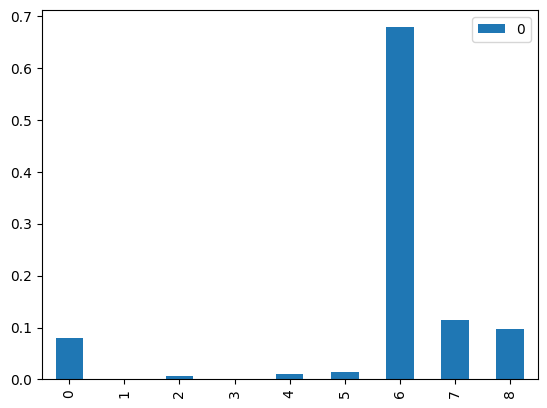

In [ ]:
i = 0
for feature in model_wg.feature_importances_:
  print("Feature ",i,": ",round(feature*100,2),"%")
  i += 1

feature_names = ['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']
feature_importance = model_wg.feature_importances_
pd.DataFrame(feature_importance).head(200).plot(kind = 'bar')

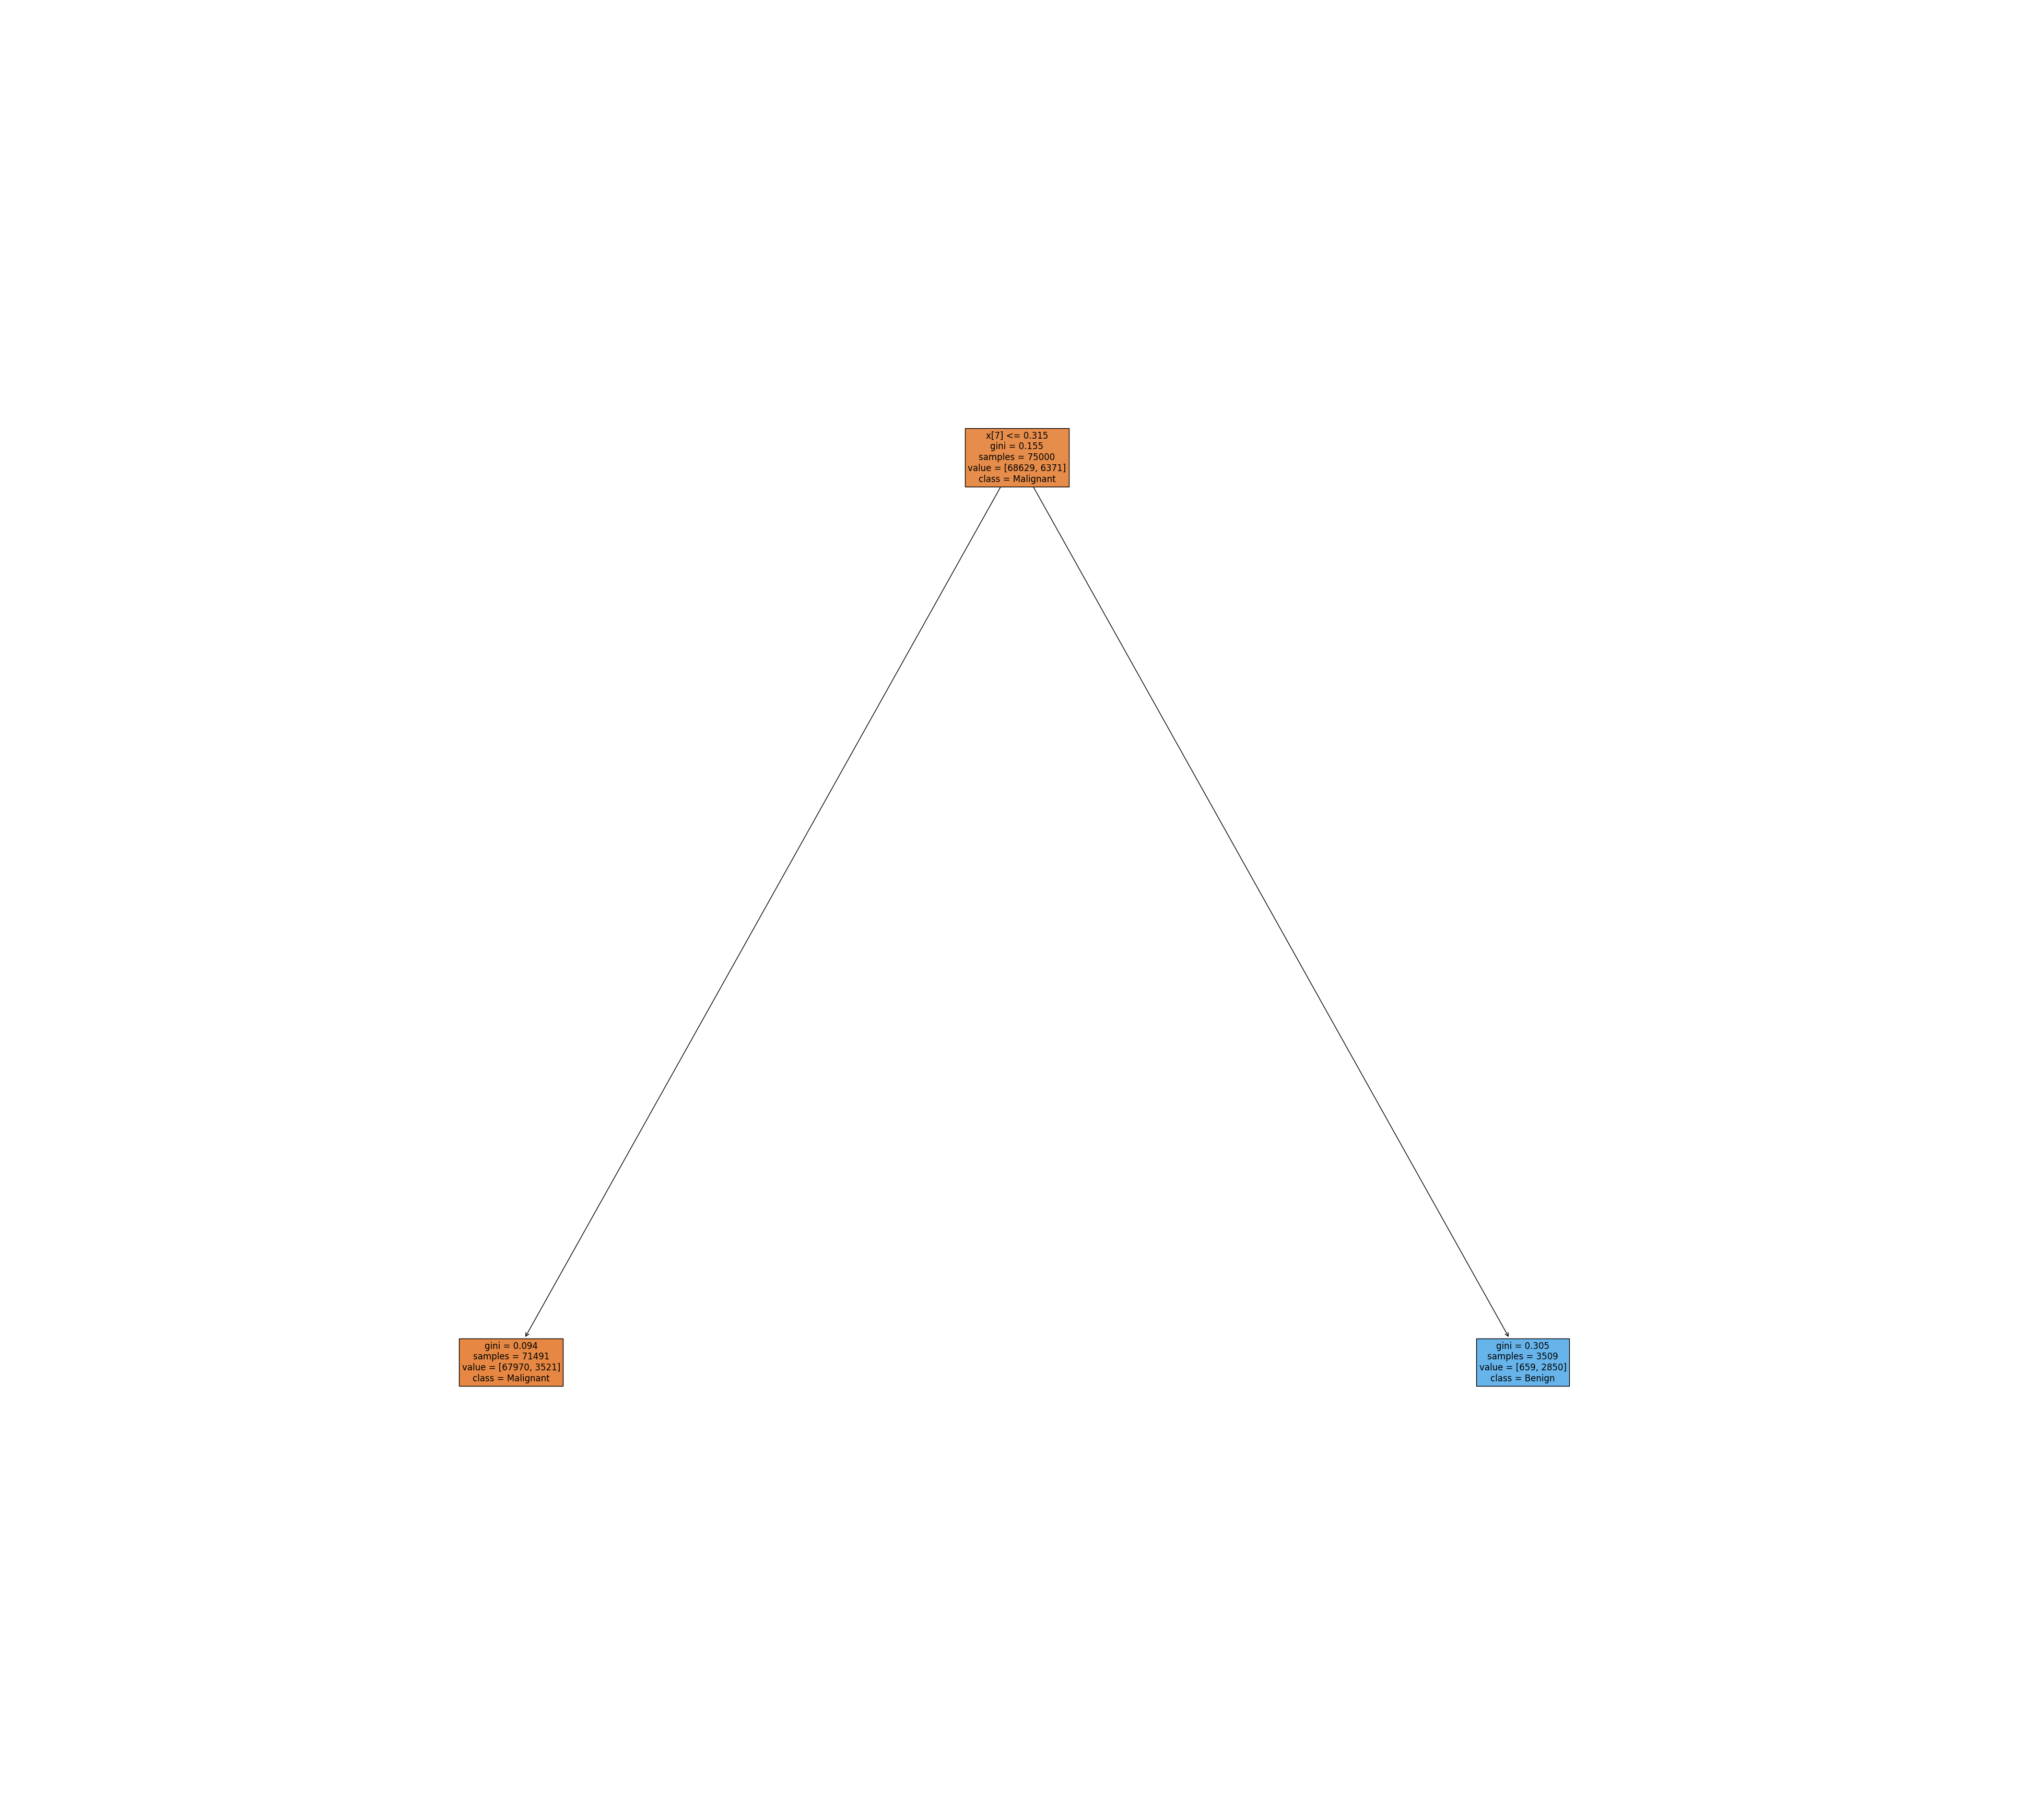

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
# feature_names = feature_names
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(model,
                                                   class_names={0:'Malignant', 1:'Benign'},
                                                   filled = True,
                                                   fontsize =12)

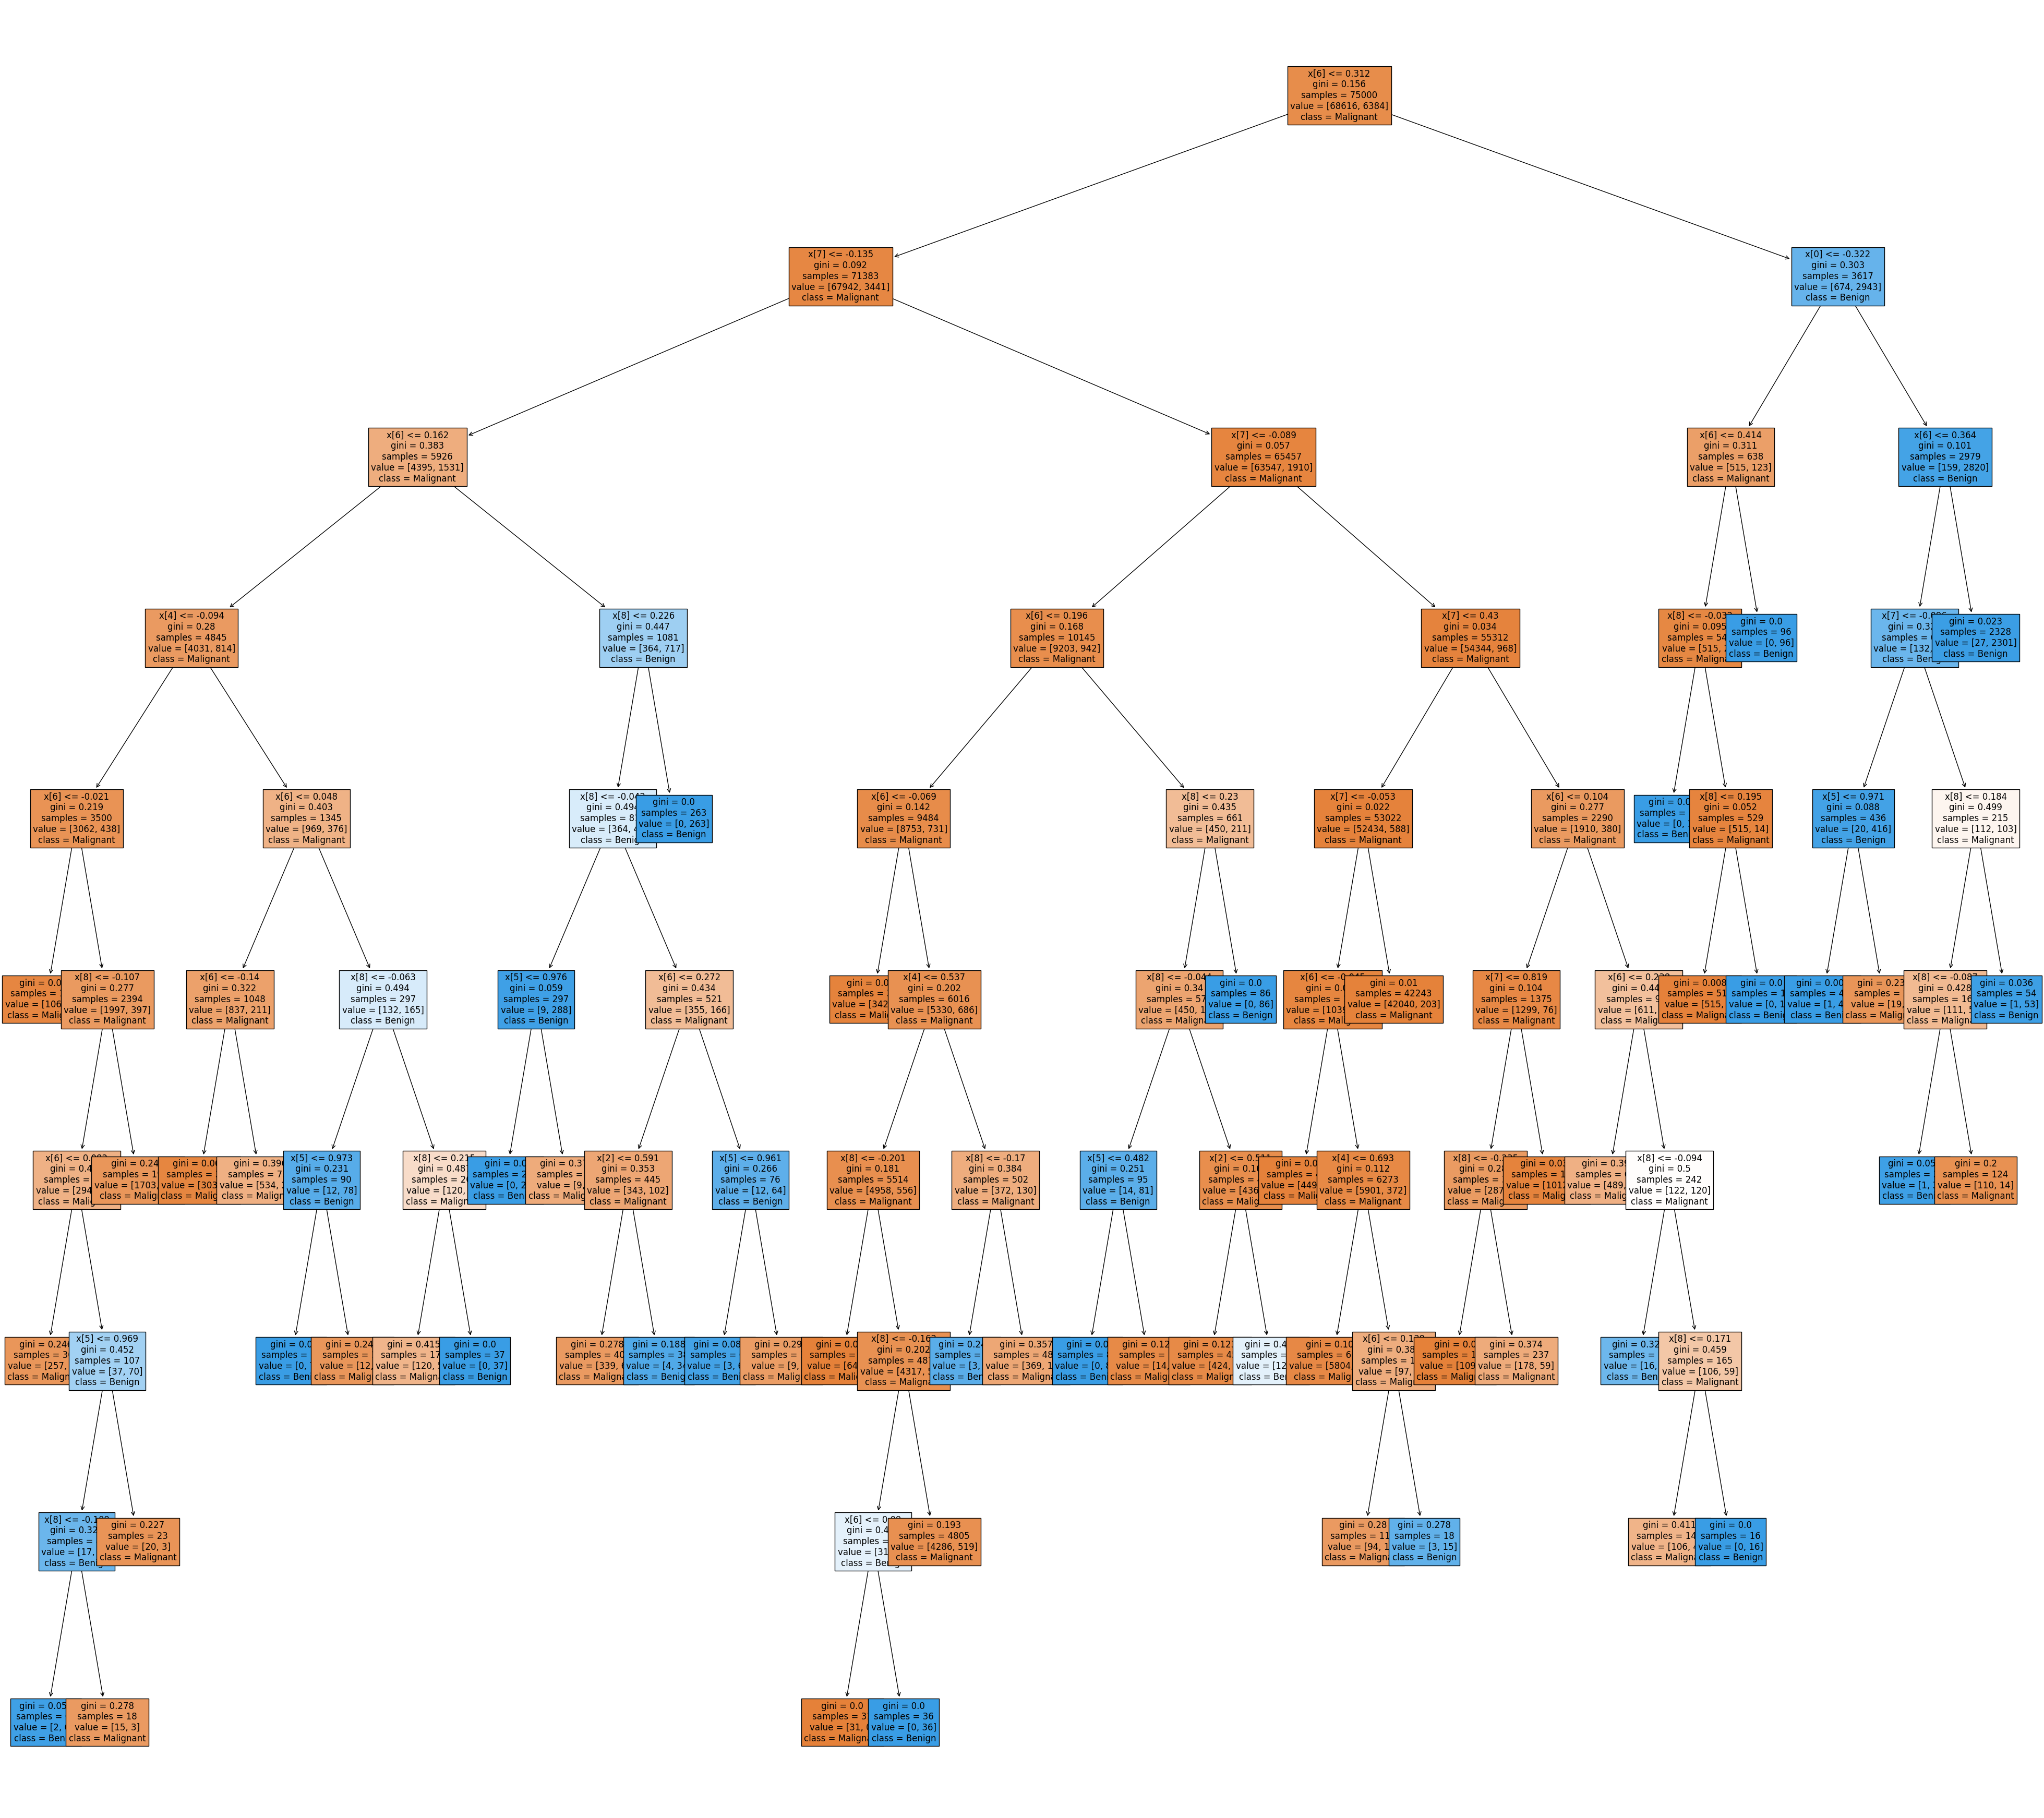

In [ ]:
fig2 = plt.figure(figsize = (50,45))
_ = tree.plot_tree(model_wg,
                              class_names={0:'Malignant', 1:'Benign'},
                                                   filled = True,
                                                   fontsize =12)